In [1]:

import pandas as pd
import numpy as np
import plotnine as p9
from datetime import date
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error,mean_squared_error
import sys, os
import time
from sklearn.utils.estimator_checks import check_estimator
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import numpy as np

In [ ]:
# Name some string contants
out_dir = "/scratch/da2343/cs685fall22/data"
out_file = out_dir + f'/my_pearson_algorithm_model_complexity_{str(date.today())}_results.csv'
test_df_file = out_dir + '/my_pearson_test_df.csv'
hmp2prot_data_path = './amgut1_data_scaled.csv'
n_splits = 3

# Import the csv file of the amgut1_data
amgut_data = pd.read_csv(hmp2prot_data_path, header=0, index_col=0)
(n_rows, n_cols) = amgut_data.shape
sub_data_dict = {}

# drop only one column per every iteration to form the input matrix
# make the column you removed the output
# print the size of the input matrix
for index_col in range(n_cols):
    output_vec = amgut_data.iloc[:, index_col].to_frame()
    input_mat = amgut_data.drop(amgut_data.columns[index_col], axis=1)
    # Subset the data by decreasing the number of rows per iteration
    for index_row in range(0, n_rows-20, 20):
        input_mat_update = input_mat.iloc[:-index_row, :].to_numpy() if index_row != 0 else input_mat.to_numpy()
        output_vec_update = output_vec.iloc[:-index_row, :].to_numpy().ravel() if index_row != 0 else output_vec.to_numpy().ravel()
        sub_data_dict[f"amgut_r_{index_row}_c_{index_col}"] = (
            input_mat_update, output_vec_update, index_col)
data_dict= {
    'Amgut1' : sub_data_dict
}  

<AxesSubplot:title={'center':'Crohns Dataset Pearson Correlation Lower Triangular Matrix'}>

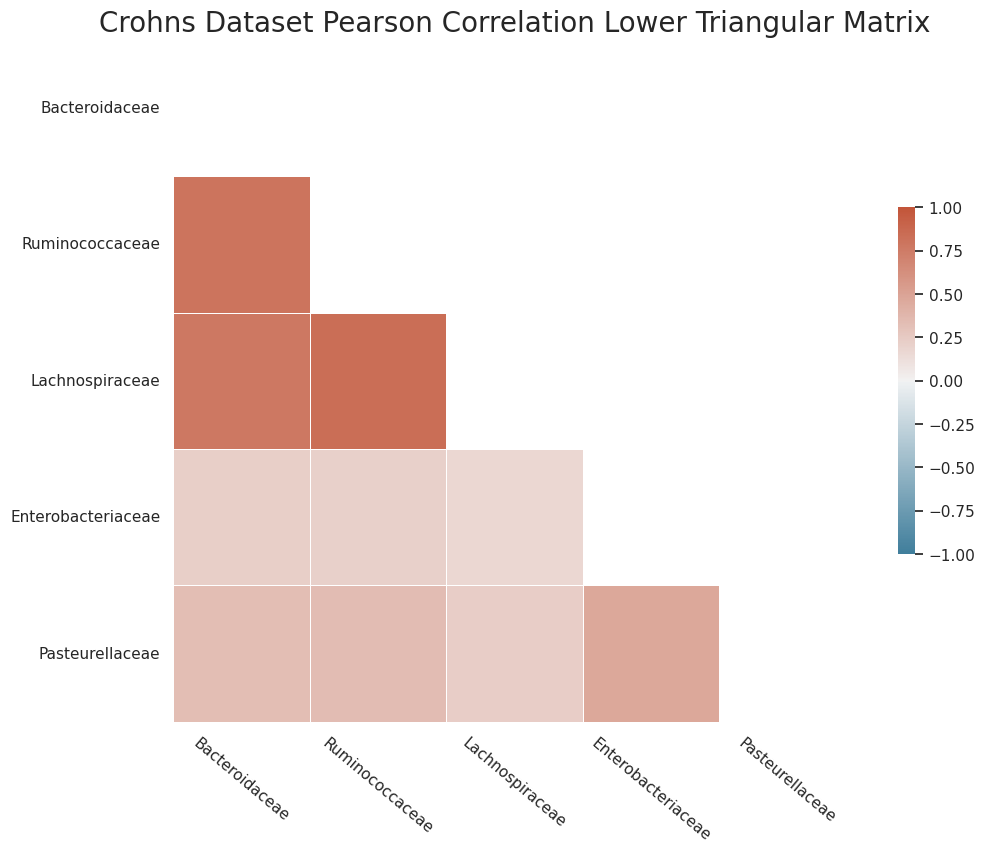

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset with synthetic nature (categorical + numerical)
data = sns.load_dataset("titanic")
df = pd.DataFrame(data=data)

hmp2prot_data_path = '/home/da2343/cs685_fall22/data/crohns_data_log_standard_scaled_transformed.csv'
df = pd.read_csv(hmp2prot_data_path)

# remove the f__ and g__ from the column names
df.columns = df.columns.str.replace('f__', '')

# Compute the correlation matrix
corr = df.corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a mask for the whole matrix
# mask = np.zeros_like(corr, dtype=bool)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#set title
plt.title('Crohns Dataset Pearson Correlation Lower Triangular Matrix', fontsize=20)

# change the angle of the x axis labels
plt.xticks(rotation=-40)


# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

6


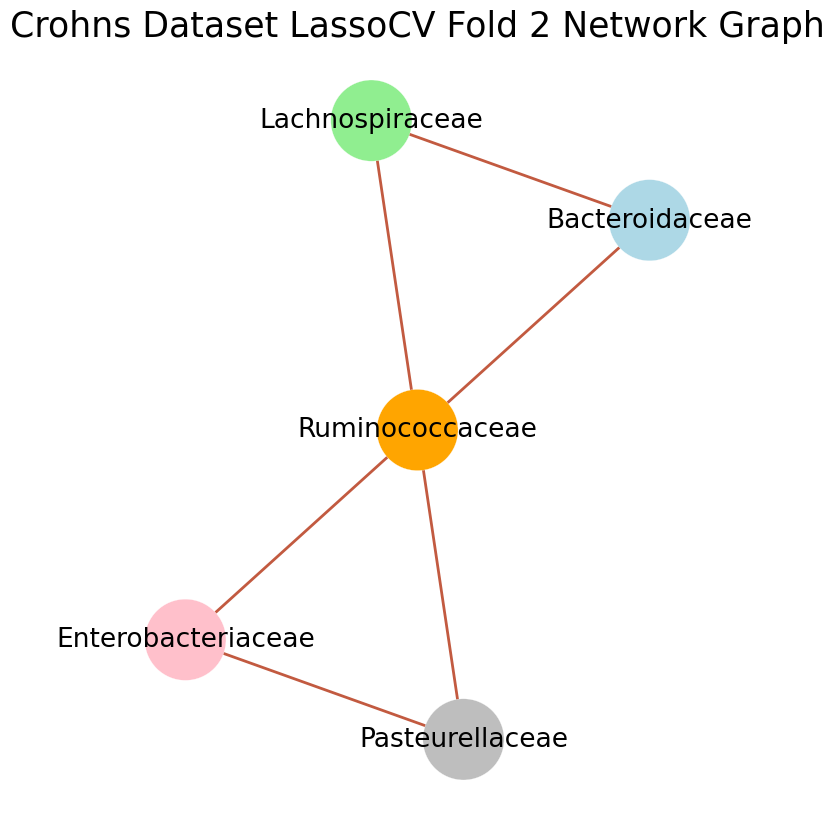

9


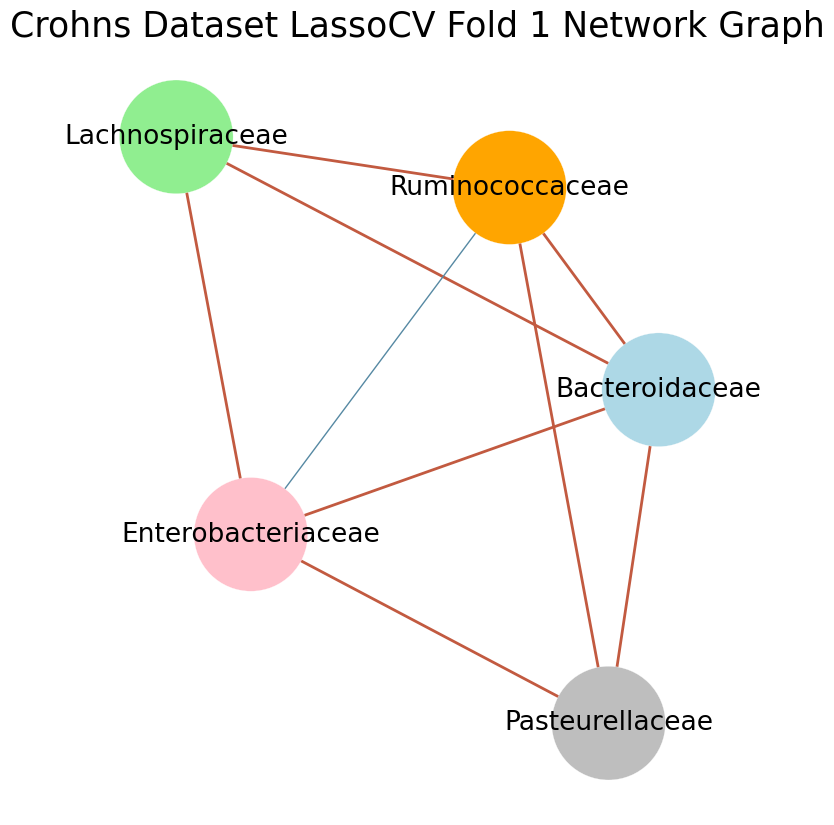

8


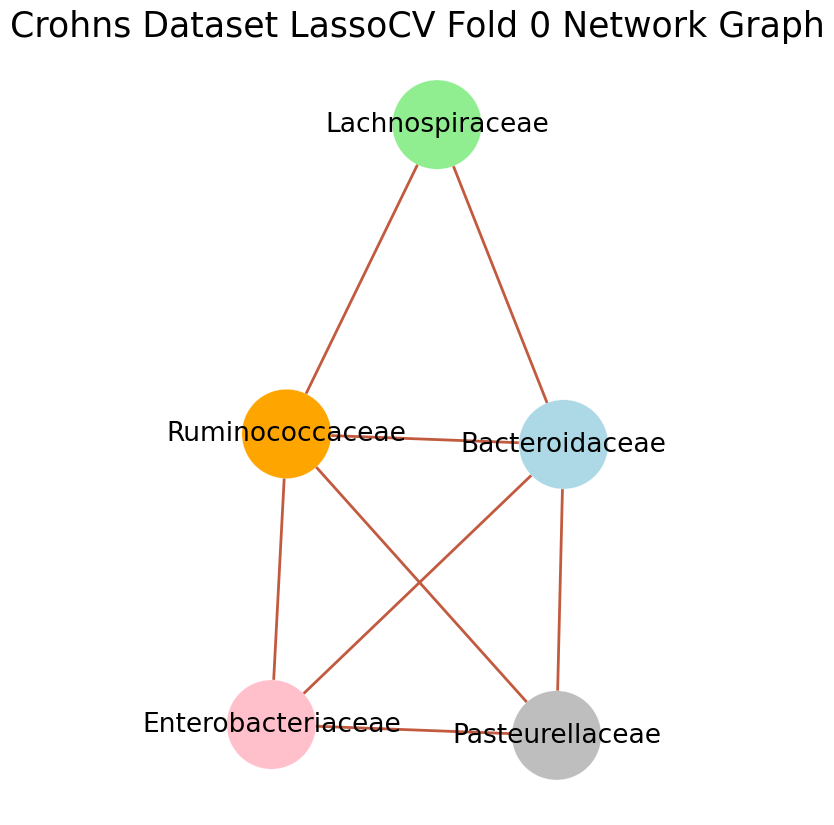

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig

data_list = [
    {
        'title': 'Crohns Dataset LassoCV Fold 2 Network Graph',
        'dataset_path': '/home/da2343/cs685_fall22/my_pearson_multicol/lasso_coef/crohns_coef_2022-12-07_12:41_fold_2.csv'
    },
    {
        'title': 'Crohns Dataset LassoCV Fold 1 Network Graph',
        'dataset_path': '/home/da2343/cs685_fall22/my_pearson_multicol/lasso_coef/crohns_coef_2022-12-07_12:41_fold_1.csv'
    },
      {
        'title': 'Crohns Dataset LassoCV Fold 0 Network Graph',
        'dataset_path': '/home/da2343/cs685_fall22/my_pearson_multicol/lasso_coef/crohns_coef_2022-12-07_12:41_fold_0.csv'
    },
]


def network_graph(title, dataset_path):
    colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(20)]

    links = pd.read_csv(dataset_path, header=0)
    links_filtered = links[links['Value'] != 0]
    links_filtered = links_filtered.reset_index(drop=True)


    col_names_list = pd.read_csv('/home/da2343/cs685_fall22/data/crohns_data_log_standard_scaled_transformed.csv', header=0).columns.str.replace('f__', '').to_list()

    print(len(links_filtered))

    # col_names_list = df.columns
    # df.columns = [i for i in range(5)]


    # number of unique variables in the links_filtered var1 and var2 columns

    # loop through the rows of the links_filtered dataframe and add the edges to the graph

    n_vertices = 5
    edges_filtered = [(int(links_filtered['var1'][i]) , int(links_filtered['var2'][i])) for i in range(len(links_filtered))]
    # edges_filtered = []         
    graph = ig.Graph(n_vertices, edges_filtered)
    graph["title"] = title
    graph.vs["name"] = col_names_list
    # give each vertex a unique color

    #generate 20 different colors using color codes
    graph.vs["color"] = ['lightblue', 'orange', 'lightgreen', 'pink', 'gray']
    # graph.vs["color"] = colors

    # print(colors)

    #TODO: Check if this is the right way to do this
    graph.es["sign"] = [True if links_filtered['Value'][i] > 0 else False for i in range(len(links_filtered)) ]
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(graph["title"], fontsize=25)

    ig.plot(
        graph,
        target=ax,
        # layout="circle", # print nodes in a circular layout
        vertex_size=0.3,
        vertex_color = graph.vs["color"],
        vertex_frame_width=0.2,
        vertex_frame_color="white",
        vertex_label=graph.vs["name"],
        vertex_label_size=19.0,
        edge_width=[2 if sign else 1 for sign in graph.es["sign"]],
        edge_color=["#C25A40" if sign else "#5689A3" for sign in graph.es["sign"]],
        vertex_label_color = "white",
    )
    plt.show()
    
for data in data_list:
    title = data['title']
    dataset_path = data['dataset_path']
    network_graph(title, dataset_path)
    

['#2F8CAE', '#B193B1', '#1903D3', '#EF4016', '#1A4D54', '#EBFB62', '#753391', '#C4F73B', '#C8244D', '#6D8FAD', '#35AE4E', '#57B9E4', '#FBEB49', '#850BDA', '#D5D0BA', '#504B6D', '#FCF647', '#E9F3D0', '#A498E4', '#261F1F']


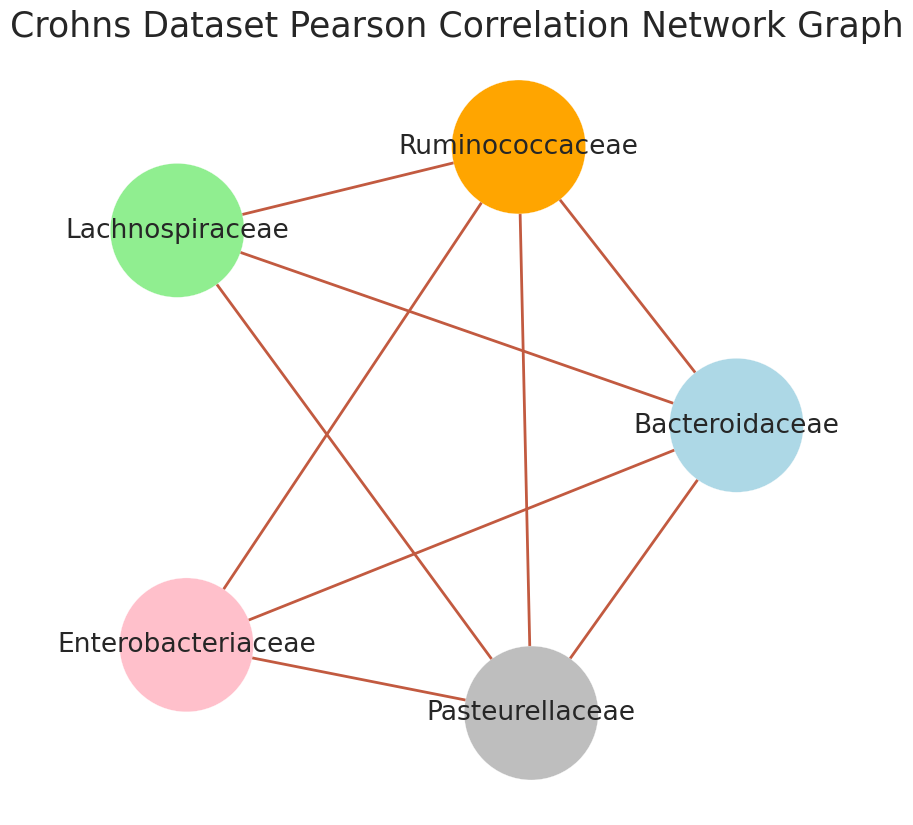

In [35]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig

title = 'Crohns Dataset Pearson Correlation Network Graph'
dataset_path = '/home/da2343/cs685_fall22/data/crohns_data_log_standard_scaled_transformed.csv'
threshold = 0.2
colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(20)]

df = pd.read_csv(dataset_path, header=0)
# take first 20 columns
# df = df.iloc[:, :10]
col_names_list = df.columns.str.replace('f__', '').to_list()
df.columns = [i for i in range(len(col_names_list))]
corr = df.corr()

links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
links_filtered = links.loc[(links['var1'] != links['var2'] ) & (links['value'] > threshold) ]
links_filtered = links_filtered.reset_index(drop=True)

# number of unique variables in the links_filtered var1 and var2 columns
n_vertices = len(links_filtered['var1'].unique())   
edges = [(int (links_filtered['var1'][i]) , int(links_filtered['var2'][i])) for i in range(len(links_filtered))]
# filter edges list to remove same edges (i.e. (1,2) and (2,1) are the same edge)
edges_filtered = []
for edge in edges:
    (v1, v2) = edge
    if (v2, v1) not in edges_filtered:
         edges_filtered.append(edge)
# edges_filtered = []         
graph = ig.Graph(n_vertices, edges_filtered)
graph["title"] = title
graph.vs["name"] = col_names_list
# give each vertex a unique color

#generate 20 different colors using color codes
graph.vs["color"] = ['lightblue', 'orange', 'lightgreen', 'pink', 'gray']
# graph.vs["color"] = colors

print(colors)

#TODO: Check if this is the right way to do this
graph.es["sign"] = [ True if links_filtered['value'][i] > 0 else False for i in range(len(links_filtered)) ]
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title(graph["title"], fontsize=25)

ig.plot(
    graph,
    target=ax,
    # layout="circle", # print nodes in a circular layout
    vertex_size=0.3,
    # vertex_color = graph.vs["color"],
    vertex_frame_width=0.2,
    vertex_frame_color="white",
    vertex_label=graph.vs["name"],
    vertex_label_size=19.0,
    edge_width=[2 if sign else 1 for sign in graph.es["sign"]],
    edge_color=["#C25A40" if sign else "#AAA" for sign in graph.es["sign"]],
    vertex_label_color = "white",
)
plt.show()

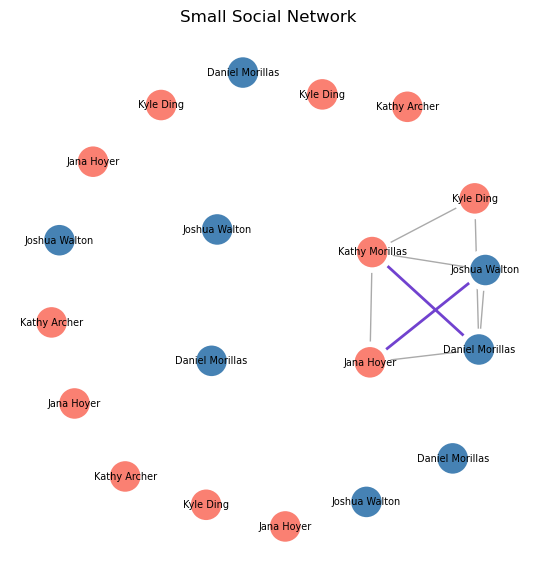

In [25]:
import igraph as ig
import matplotlib.pyplot as plt

# Construct a graph with 3 vertices

# n_vertices is going to be the number of rows in the correlation matrix
n_vertices = 20
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (3, 4)]
graph = ig.Graph(n_vertices, edges)


# Set attributes for the graph, nodes, and edges
graph["title"] = "Small Social Network"
graph.vs["name"] = ["Daniel Morillas", "Kathy Archer", "Kyle Ding", "Joshua Walton", "Jana Hoyer"]
graph.vs["gender"] = ["M", "F", "F", "M", "F"]
graph.es["married"] = [False, False, False, False, False, False, False, True]

# Set individual attributes
graph.vs[1]["name"] = "Kathy Morillas"
graph.es[0]["married"] = True

# Plot in matplotlib
# Note that attributes can be set globally (e.g. vertex_size), or set individually using arrays (e.g. vertex_color)
fig, ax = plt.subplots(figsize=(7,7))
ax.set_title(graph["title"])

layout = graph.layout("kk")

ig.plot(
    graph,
    target=ax,
    layout=layout, # print nodes in a circular layout
    vertex_size=0.5,
    vertex_color=["steelblue" if gender == "M" else "salmon" for gender in graph.vs["gender"]],
    vertex_frame_width=4.0,
    vertex_frame_color="white",
    vertex_label=graph.vs["name"],
    vertex_label_size=7.0,
    edge_width=[2 if married else 1 for married in graph.es["married"]],
    edge_color=["#7142cf" if married else "#AAA" for married in graph.es["married"]]
)
# set title
plt.show()

In [ ]:
import igraph as ig
import matplotlib.pyplot as plt
graph = ig.Graph()
graph = ig.Graph(n=10, edges=[[0, 1], [0, 5]])
print(graph)

In [ ]:


class MyPearsonRegressor(BaseEstimator, RegressorMixin):
    def __init__(self , threshold = 0.5):
        self.threshold = threshold
    
    def fit(self,X, y):
        slope_list = []
        intercept_list = []
        for index_col in range(X.shape[1]):
            X_col = X[:, index_col]
            calc_slope, calc_intercept = self.find_model_params(X_col, y)
            slope_list.append(calc_slope)
            intercept_list.append(calc_intercept)
        # Find the mean of the gradients and intercepts
        self.slope_list = slope_list
        self.intercept_list = intercept_list
        return self
    
    def find_model_params(self, X_col, y_col):
        calc_cor = np.corrcoef(X_col, y_col)[0, 1]
        # If the correlation is greater than the threshold, then calculate the gradient and intercept
        if abs(calc_cor) > self.threshold:
            calc_grad = calc_cor * np.std(y_col) / np.std(X_col)
            calc_intercept = np.mean(y_col) - calc_grad * np.mean(X_col)
        else:
            calc_grad = 0
            calc_intercept = 0     
        return calc_grad, calc_intercept
    

    def predict(self, X):
        pred_y_list = []
        for index_col in range(X.shape[1]):
            X_col = X[:, index_col]
            calc_y = self.slope_list[index_col] * X_col + self.intercept_list[index_col]
            pred_y_list.append(calc_y)
        # Find the mean of the predicted y values
        pred_y = np.mean(pred_y_list, axis=0)
        return pred_y    


def hyperparameter_training_and_diagnostic_plot():
    amgut_data = pd.read_csv(hmp2prot_data_path, header=0, index_col=0)
    (n_rows, n_cols) = amgut_data.shape
    sub_data_dict = {}
    # drop only one column per every iteration to form the input matrix
    # make the column you removed the output
    # print the size of the input matrix
    for index_col in range(n_cols):
        output_vec = amgut_data.iloc[:, index_col].to_frame()
        input_mat = amgut_data.drop(amgut_data.columns[index_col], axis=1)
        sub_data_dict[f"amgut_c_{index_col}"] = (
                input_mat.to_numpy(), output_vec.to_numpy().ravel(), index_col)   
        
    data_dict= {
        'Amgut1' : sub_data_dict
    }  

    param_dicts = [{'threshold':[threshold]} for threshold in np.arange(0.0, 1.0, 0.05)]

    main_test_df_list = []    
    for data_set_name, data_dict_val in data_dict.items():
        for sub_data_set, (input_mat, output_vec, index_col) in data_dict_val.items():
            k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
            for fold_id, indices in enumerate(k_fold.split(input_mat)):
                index_dict = dict(zip(["train", "test"], indices))
                set_data_dict = {}
                for set_name, index_vec in index_dict.items():
                    set_data_dict[set_name] = {
                        "X": input_mat[index_vec],
                        "y": output_vec[index_vec]
                    }
        
        
                my_pearson_learner = GridSearchCV(MyPearsonRegressor(), param_dicts, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
                my_pearson_learner.fit(**set_data_dict["train"])
                # create a dataframe with columns: data_set_name, fold_id, set_name(subtrain or validation), threshold, index_col, loss
                test_loss_dict = {
                    'data_set_name': [data_set_name],
                    'fold_id': [fold_id],
                    'index_col': [index_col],
                    'algorithm': ['GridSearchCV+MyPearsonRegressor'],
                    'subtrain_loss': -my_pearson_learner.cv_results_['mean_train_score'],
                    'validation_loss': -my_pearson_learner.cv_results_['mean_test_score'],
                    'threshold': my_pearson_learner.cv_results_['param_threshold'].data
                }
                
                test_loss_df = pd.MultiIndex.from_product(
                    test_loss_dict.values(),
                    names=test_loss_dict.keys()
                ).to_frame().reset_index(drop=True)

                # print(test_loss_df)
                main_test_df_list.append(test_loss_df)
                
    main_test_df = pd.concat(main_test_df_list)        
    # Save dataframe as a csv to output directory
    # os.system("mkdir -p " + out_dir)
    main_test_df.to_csv("amgut1_pearson_model_complexity.csv", encoding='utf-8', index=False)
    #print full dataframe
    print(main_test_df)
    print("Done!!")
    
        
hyperparameter_training_and_diagnostic_plot()           

In [ ]:
# generate a list of alphas with base of number 10 to use for the lasso regression
slope_list = [10 ** x for x in range(-50, 50)]
calc_slope = np.mean([x for x in slope_list if x is not None]) if slope_list[0] is None else slope_list[0]

print(calc_slope)

# print(np.arange(1, 10.1, 3))

[-0.059738586173144086, -0.0, 0.26545690254008397, 0.4718729612737654]
[-0.05973859 -0.          0.2654569   0.47187296]
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.059739              -0.0           0.265457          0.471873


/tmp/ipykernel_2774847/3473341904.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.


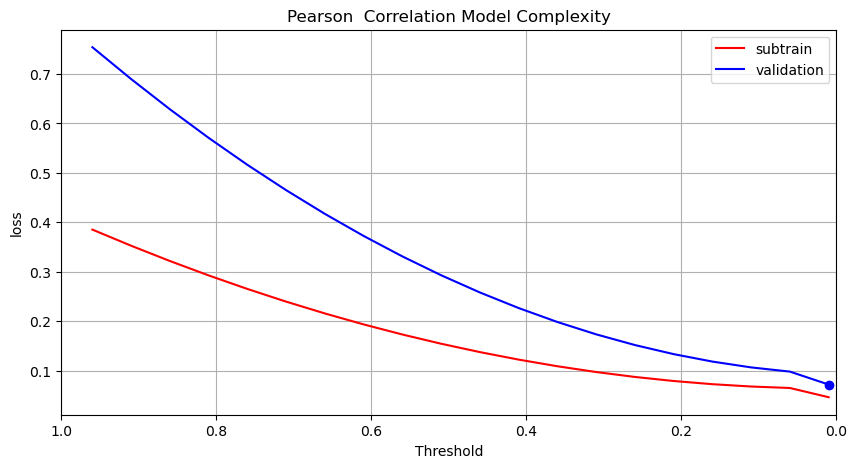

Done!!


In [35]:
from sklearn import svm, datasets
from sklearn.linear_model import Lasso

# load another dataset from datasets
iris  = datasets.load_iris()

# clf = GridSearchCV(MyPearsonRegressor(), param_dicts, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
# clf.fit(iris.data, iris.target)
my_lasso = Lasso()
clf = GridSearchCV(Lasso(), [{'alpha':[alpha]} for alpha in np.arange(0.01, 1.0, 0.05)], cv=5, scoring='neg_mean_squared_error', return_train_score=True)
clf.fit(iris.data, iris.target)
regularization_param  = 'alpha'
# print(clf.best_params_)
# print(clf.best_score_)

# make a dataframe with columns for the threshold, mean train score, mean test score
test_err_df = pd.DataFrame(clf.cv_results_['params'])
test_err_df['subtrain'] = clf.cv_results_['mean_train_score'] * -1
test_err_df['validation'] = clf.cv_results_['mean_test_score'] * -1

dataset_pd = pd.read_csv("/home/da2343/cs685_fall22/data/amgut1_data_log_standard_scaled_transformed.csv", header=0, index_col=0)
col_names = list(dataset_pd.columns)

# print the coefficients 
# Create a new dataframe to store the coefficients
# columns should be the number of features
# get the name of the features from the iris dataset
col_names = iris.feature_names
# convert coef to numpy array
coef =  np.array([clf.best_estimator_.coef_])
coeff_df = pd.DataFrame(coef, columns=col_names)

coef_list  = clf.best_estimator_.coef_.tolist()
print(coef_list)

print(clf.best_estimator_.coef_)

print(coeff_df)

import matplotlib.pyplot as plt

# make a plot of the mean train score and mean test score for each threshold
test_err_df.plot(x=regularization_param, y=['subtrain', 'validation'], title='Pearson  Correlation Model Complexity', xlabel='Threshold', ylabel='loss', color = ['red', 'blue'],figsize=(10, 5),  grid=True, legend=True, rot=0)
#mark only the best threshold with a blue dot
plt.plot(test_err_df.iloc[clf.best_index_][regularization_param], test_err_df.iloc[clf.best_index_]['validation'], 'bo', label='best threshold', color='blue')
# best_threshold = test_err_df.loc[test_err_df['validation'].idxmin()]['threshold']
# plt.axvline(x=best_threshold, color='black', linestyle='dashed', linewidth=1)

# scale x axis from 1 to 0
plt.xlim(1, 0)
#reverse the scale of the x axis,
# plt.gca().invert_xaxis()
plt.show()

# test_err_df.to_csv("iris_data_model_comp.csv", encoding='utf-8', index=False)
print("Done!!")


In [31]:
import math

mlist = [1, 2, 3]
# add NA to a particular index
mlist.insert(1, math.nan)
print(mlist)

df2 = pd.DataFrame(np.array([mlist]),
                   columns=['a', 'b', 'c', 'd'])

# save the dataframe to a csv file
df2.to_csv("testNAN.csv", encoding='utf-8', index=False)


[1, nan, 2, 3]


In [ ]:
test_err_list = []

for data_set_name, data_dict_val in data_dict.items():
    for sub_data_set, (input_mat, output_vec, pred_col) in data_dict_val.items():
        k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
        for fold_id, indices in enumerate(k_fold.split(input_mat)):
            index_dict = dict(zip(["train", "test"], indices))
            set_data_dict = {}
            for set_name, index_vec in index_dict.items():
                set_data_dict[set_name] = {
                    "X": input_mat[index_vec],
                    "y": output_vec[index_vec]
                }
            param_dicts = [{'threshold':[0.1]}, {'threshold':[0.2]}, {'threshold':[0.3]}, {'threshold':[0.4]}, {'threshold':[0.5]}, {'threshold':[0.6]}, {'threshold':[0.7]}, {'threshold':[0.8]}, {'threshold':[0.9]}]
            
            my_pearson = GridSearchCV(MyPearsonRegressor(), param_dicts) 
            my_pearson.fit(**set_data_dict["train"])           
            
            test_data_x = set_data_dict["test"]['X']
            test_data_y = set_data_dict["test"]['y']
            pred_vec = my_pearson.predict(test_data_x)
            
            mse = mean_squared_error(test_data_y, pred_vec)
            # ymin is the mse - std
            ymin = mse - np.std(pred_vec)
            ymax = mse + np.std(pred_vec)

            test_err_dict = {
                "Mean Squared Error": mse,
                "FoldID" : fold_id,
                "ymin" : ymin,
                "ymax" : ymax,
                "# of Samples": input_mat.shape[0],
                "Dataset" : data_set_name,
                "Index of Predicted Column": pred_col,
                "Algorithm": "Pearson Correlation"
            }
            print(test_err_dict)
            test_err_list.append(pd.DataFrame(test_err_dict, index=[0]))

test_err_df = pd.concat(test_err_list)
# Save dataframe as a csv to output directory
# os.system("mkdir -p " + out_dir)
# test_err_df.to_csv(out_file, encoding='utf-8', index=False)
# print("Done!!")

In [ ]:
class MyPearsonLearner:
    def __init__(self, threshold_list =  [0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] ):
      self.threshold_list = threshold_list
      
    def fit(self,X, y):
        train_features = X
        train_labels = y
        np.random.seed(1)
        n_folds = 2
        # generate random integers between 0 and 1
        fold_vec = np.random.randint(
            low=0, high=n_folds, size=train_labels.size)
        is_set_dict = {
            "subtrain": fold_vec != (n_folds-1),
            "validation": fold_vec == (n_folds-1),
        }
        set_features = {}
        set_labels = {}
        for set_name, is_set in is_set_dict.items():
            set_features[set_name] = train_features[is_set, :]
            set_labels[set_name] = train_labels[is_set]
        loss_df_list = []    
        
        for threshold in self.threshold_list:
            grad_list = []
            intercept_list = []
            subtrain_features = set_features["subtrain"]
            subtrain_labels = set_labels["subtrain"]
            
            for index_col in range(subtrain_features.shape[1]):
                X_col = subtrain_features[:, index_col]
                calc_grad, calc_intercept = self.find_model_params(X_col, subtrain_labels, threshold)
                #TODO: Change grad to slope
                grad_list.append(calc_grad)
                intercept_list.append(calc_intercept)
                
            # Find the mean of the gradients and intercepts
            self.gradient = grad_list
            self.intercept = intercept_list
            
            for set_name in set_features:
                feature_mat = set_features[set_name]
                label_vec = set_labels[set_name]
                y_hat = self.predict(feature_mat)
                set_loss = mean_squared_error(label_vec, y_hat)
                
                loss_df_list.append(pd.DataFrame({
                    "set_name": set_name,
                    "loss": set_loss,
                    "threshold": threshold,
                }, index=[0]))
                print(f"threshold: {threshold}, set_name: {set_name}, loss: {set_loss}")
        self.loss_df = pd.concat(loss_df_list)
    
    
    def train(self, X, y, data_set_name, data_col_index):
        train_features = X
        train_labels = y
        np.random.seed(1)
        n_folds = 2
        # generate random integers between 0 and 1
        fold_vec = np.random.randint(
            low=0, high=n_folds, size=train_labels.size)
        is_set_dict = {
            "subtrain": fold_vec != (n_folds-1),
            "validation": fold_vec == (n_folds-1),
        }
        set_features = {}
        set_labels = {}
        for set_name, is_set in is_set_dict.items():
            set_features[set_name] = train_features[is_set, :]
            set_labels[set_name] = train_labels[is_set]
        loss_df_list = []    
        
        for threshold in self.threshold_list:
            grad_list = []
            intercept_list = []
            subtrain_features = set_features["subtrain"]
            subtrain_labels = set_labels["subtrain"]
            
            for index_col in range(subtrain_features.shape[1]):
                X_col = subtrain_features[:, index_col]
                calc_grad, calc_intercept = self.find_model_params(X_col, subtrain_labels, threshold)
                grad_list.append(calc_grad)
                intercept_list.append(calc_intercept)
                
            # Find the mean of the gradients and intercepts
            self.gradient = grad_list
            self.intercept = intercept_list
            
            for set_name in set_features:
                feature_mat = set_features[set_name]
                label_vec = set_labels[set_name]
                y_hat = self.predict(feature_mat)
                set_loss = mean_squared_error(label_vec, y_hat)
                
                loss_df_list.append(pd.DataFrame({
                    "set_name": set_name,
                    "loss": set_loss,
                    "threshold": threshold,
                    "data_set_name": data_set_name,
                    "index_col": data_col_index
                }, index=[0]))
                print(f"threshold: {threshold}, set_name: {set_name}, loss: {set_loss}, data_col_index: {data_col_index}")
        self.loss_df = pd.concat(loss_df_list)
        
    def find_model_params(self, X_col, y_col, threshold):
        calc_cor = np.corrcoef(X_col, y_col)[0, 1]
        # If the correlation is greater than the threshold, then calculate the gradient and intercept
        if abs(calc_cor) > threshold:
            calc_grad = calc_cor * np.std(y_col) / np.std(X_col)
            calc_intercept = np.mean(y_col) - calc_grad * np.mean(X_col)
        else:
            calc_grad = 0
            calc_intercept = 0     
        return calc_grad, calc_intercept

    def predict(self, X):
        pred_y_list = []
        for index_col in range(X.shape[1]):
            X_col = X[:, index_col]
            calc_y = self.gradient[index_col] * X_col + self.intercept[index_col]
            pred_y_list.append(calc_y)
        # Find the mean of the predicted y values
        pred_y = np.mean(pred_y_list, axis=0)
        return pred_y